Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


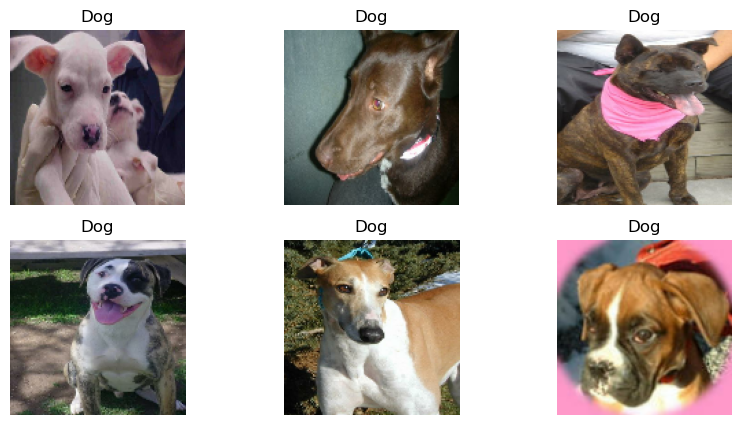

In [13]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Use raw string for Windows path (r"...")
dataset_path = "../PetImages"

# Load dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    image_size=(128, 128),
    batch_size=32,
    validation_split=0.2,
    subset="training",
    seed=123,
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    image_size=(128, 128),
    batch_size=32,
    validation_split=0.2,
    subset="validation",
    seed=123,
)

# Visualize some images
class_names = train_ds.class_names
plt.figure(figsize=(10, 5))
for images, labels in train_ds.take(1):
    for i in range(6):
        ax = plt.subplot(2, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(128, 128, 3)),  # normalize
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # binary classification
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


D:\application\anaconda\setup\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     1,605,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,699,009 (6.48 MB)

 Trainable params: 1,699,009 (6.48 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5  # Start small, we can increase later
)

Epoch 1/5
215/625 ━━━━━━━━━━━━━━━━━━━━ 1:44 255ms/step - accuracy: 0.4942 - loss: 0.7103

InvalidArgumentError: Graph execution error:

Detected at node decode_image/DecodeImage defined at (most recent call last):
<stack traces unavailable>
Input is empty.
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]] [Op:__inference_one_step_on_iterator_3663]

In [16]:
##try to fix with image filtering

import tensorflow as tf
import matplotlib.pyplot as plt

# Use raw string for Windows path (r"...")
dataset_path = "../PetImages"

# First define our validation function
def is_valid_image(image, label):
    # Check if image tensor is not empty and has valid values
    return tf.reduce_all(tf.math.is_finite(image)) and tf.not_equal(tf.size(image), 0)

# Load dataset with filtering for corrupted images
train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    image_size=(128, 128),
    batch_size=32,
    validation_split=0.2,
    subset="training",
    seed=123,
).filter(is_valid_image)

val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    image_size=(128, 128),
    batch_size=32,
    validation_split=0.2,
    subset="validation",
    seed=123,
).filter(is_valid_image)

# Visualize some images
class_names = train_ds.class_names
plt.figure(figsize=(10, 5))
for images, labels in train_ds.take(1):
    for i in range(min(6, len(images))):  # Added safety check
        ax = plt.subplot(2, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(128, 128, 3)),  # normalize
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # binary classification
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

# Add some error handling for the fit process
try:
    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=5,  # Start small, we can increase later
        verbose=1
    )
except Exception as e:
    print(f"Error during training: {e}")
    # Additional debugging: check for problematic batches
    for i, batch in enumerate(train_ds):
        try:
            # Try to process the batch
            images, labels = batch
            _ = model.predict(images[0:1])  # Try predicting one image
        except Exception as batch_error:
            print(f"Error in batch {i}: {batch_error}")
            # Print the problematic file paths if available
            if hasattr(batch, 'file_paths'):
                print(f"Problematic files: {batch.file_paths}")

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


AttributeError: '_FilterDataset' object has no attribute 'class_names'